# 15-LOX Enzymes Analysis - Update

This is the modified version of the initial analysis with 5 LOX enzymes and currently it includs only **LOX-15A, LOX-15B** and linoleate 13S-lipoxygenase-1 (**LOX-13S**).

## Define the Kyte & Doolittle hydrophobicity Index

The values were taken from https://web.expasy.org/protscale/ website. Be cautious: Hydrophobic amino acids are assigned larger positive values and hydrophylic ones negative values. In the dictionary below, each amino acid is represented by single conventional letter code (key) and the score is written on the right (value).

In [23]:
kyte_doolittle = {'A': 1.8,'R':-4.5,'N':-3.5,'D':-3.5,'C': 2.5,
                  'Q':-3.5,'E':-3.5,'G':-0.4,'H':-3.2,'I': 4.5,
                  'L': 3.8,'K':-3.9,'M': 1.9,'F': 2.8,'P':-1.6,
                  'S':-0.8,'T':-0.7,'W':-0.9,'Y':-1.3,'V': 4.2}

In [2]:
kyte_doolittle

{'A': 1.8,
 'R': -4.5,
 'N': -3.5,
 'D': -3.5,
 'C': 2.5,
 'Q': -3.5,
 'E': -3.5,
 'G': -0.4,
 'H': -3.2,
 'I': 4.5,
 'L': 3.8,
 'K': -3.9,
 'M': 1.9,
 'F': 2.8,
 'P': -1.6,
 'S': -0.8,
 'T': -0.7,
 'W': -0.9,
 'Y': -1.3,
 'V': 4.2}

In [24]:
def doolitleindex(seq):
    values = []
    for residue in seq:
        values.append(kyte_doolittle[residue])
    return values

## Protein Sequences

In [4]:
NP_001131_3 = ("MGLYRIRVSTGASLYAGSNNQVQLWLVGQHGEAALGKRLWPARGKETELKVEVPEYLGPLLFVKLRKRHL"
               "LKDDAWFCNWISVQGPGAGDEVRFPCYRWVEGNGVLSLPEGTGRTVGEDPQGLFQKHREEELEERRKLYR"
               "WGNWKDGLILNMAGAKLYDLPVDERFLEDKRVDFEVSLAKGLADLAIKDSLNVLTCWKDLDDFNRIFWCG"
               "QSKLAERVRDSWKEDALFGYQFLNGANPVVLRRSAHLPARLVFPPGMEELQAQLEKELEGGTLFEADFSL"
               "LDGIKANVILCSQQHLAAPLVMLKLQPDGKLLPMVIQLQLPRTGSPPPPLFLPTDPPMAWLLAKCWVRSS"
               "DFQLHELQSHLLRGHLMAEVIVVATMRCLPSIHPIFKLIIPHLRYTLEINVRARTGLVSDMGIFDQIMST"
               "GGGGHVQLLKQAGAFLTYSSFCPPDDLADRGLLGVKSSFYAQDALRLWEIIYRYVEGIVSLHYKTDVAVK"
               "DDPELQTWCREITEIGLQGAQDRGFPVSLQARDQVCHFVTMCIFTCTGQHASVHLGQLDWYSWVPNAPCT"
               "MRLPPPTTKDATLETVMATLPNFHQASLQMSITWQLGRRQPVMVAVGQHEEEYFSGPEPKAVLKKFREEL"
               "AALDKEIEIRNAKLDMPYEYLRPSVVENSVAI")

In [5]:
NP_001034219_1 = ("MAEFRVRVSTGEAFGAGTWDKVSVSIVGTRGESPPLPLDNLGKEFTAGAEEDFQVTLPEDVGRVLLLRVH"
                  "KAPPVLPLLGPLAPDAWFCRWFQLTPPRGGHLLFPCYQWLEGAGTLVLQEGTAKVSWADHHPVLQQQRQE"
                  "ELQARQEMYQWKAYNPGWPHCLDEKTVEDLELNIKYSTAKNANFYLQAGSAFAEMKIKGLLDRKGLWRSL"
                  "NEMKRIFNFRRTPAAEHAFEHWQEDAFFASQFLNGLNPVLIRRCHYLPKNFPVTDAMVASVLGPGTSLQA"
                  "ELEKGSLFLVDHGILSGIQTNVINGKPQFSAAPMTLLYQSPGCGPLLPLAIQLSQTPGPNSPIFLPTDDK"
                  "WDWLLAKTWVRNAEFSFHEALTHLLHSHLLPEVFTLATLRQLPHCHPLFKSTGIGIEGFSELIQRNMKQL"
                  "NYSLLCLPEDIRTRGVEDIPGYYYRDDGMQIWGAVERFVSEIIGIYYPSDESVQDDRELQAWVREIFSKG"
                  "FLNQESSGIPSSLETREALVQYVTMVIFTCSAKHAAVSAGQFDSCAWMPNLPPSMQLPPPTSKGLATCEG"
                  "FIATLPPVNATCDVILALWLLSKEPGDQRPLGTYPDEHFTEEAPRRSIATFQSRLAQISRGIQERNQGLV"
                  "LPYTYLDPPLIENSVSI")

In [6]:
NP_001236153_2 = ("MFSAGHKIKGTVVLMPKNELEVNPDGSAVDNLNAFLGRSVSLQLISATKADAHGKGKVGKDTFLEGINTS"
                  "LPTLGAGESAFNIHFEWDGSMGIPGAFYIKNYMQVEFFLKSLTLEAISNQGTIRFVCNSWVYNTKLYKSV"
                  "RIFFANHTYVPSETPAPLVEYREEELKSLRGNGTGERKEYDRIYDYDVYNDLGNPDKSEKLARPVLGGSS"
                  "TFPYPRRGRTGRGPTVTDPNTEKQGEVFYVPRDENLGHLKSKDALEIGTKSLSQIVQPAFESAFDLKSTP"
                  "IEFHSFQDVHDLYEGGIKLPRDVISTIIPLPVIKELYRTDGQHILKFPQPHVVQVSQSAWMTDEEFAREM"
                  "IAGVNPCVIRGLEEFPPKSNLDPAIYGDQSSKITADSLDLDGYTMDEALGSRRLFMLDYHDIFMPYVRQI"
                  "NQLNSAKTYATRTILFLREDGTLKPVAIELSLPHSAGDLSAAVSQVVLPAKEGVESTIWLLAKAYVIVND"
                  "SCYHQLMSHWLNTHAAMEPFVIATHRHLSVLHPIYKLLTPHYRNNMNINALARQSLINANGIIETTFLPS"
                  "KYSVEMSSAVYKNWVFTDQALPADLIKRGVAIKDPSTPHGVRLLIEDYPYAADGLEIWAAIKTWVQEYVP"
                  "LYYARDDDVKNDSELQHWWKEAVEKGHGDLKDKPWWPKLQTLEDLVEVCLIIIWIASALHAAVNFGQYPY"
                  "GGLIMNRPTASRRLLPEKGTPEYEEMINNHEKAYLRTITSKLPTLISLSVIEILSTHASDEVYLGQRDNP"
                  "HWTSDSKALQAFQKFGNKLKEIEEKLVRRNNDPSLQGNRLGPVQLPYTLLYPSSEEGLTFRGIPNSISI")

The length of each protein is calculated below, and they agree with NCBI

In [51]:
print("The Length of LOX-15A is", len(NP_001131_3), "residues")
print("The Length of LOX-15B is", len(NP_001034219_1), "residues")
print("The Length of LOX-13S is", len(NP_001236153_2), "residues")

The Length of LOX-15A is 662 residues
The Length of LOX-15B is 647 residues
The Length of LOX-13S is 839 residues


## Calculate Hydrophobicity Score

In [52]:
lox15a = doolitleindex(NP_001131_3)
print("The Hydrophobicity Score of LOX-15A is", round(sum(lox15a),3))

The Hydrophobicity Score of LOX-15A is -109.8


In [53]:
lox15b = doolitleindex(NP_001034219_1)
print("The Hydrophobicity Score of LOX-15B is", round(sum(lox15b),3))

The Hydrophobicity Score of LOX-15B is -127.0


In [54]:
linoleate = doolitleindex(NP_001236153_2)
print("The Hydrophobicity Score of LOX-13S is", round(sum(linoleate),3))

The Hydrophobicity Score of LOX-13S is -262.1


**Based on Kyte & Doolitle Hydrophobicity score, all proteins are overall hydrophylic, with LOX-13S being the most of all, followed by LOX-15B and finally LOX-15A.**

## Graphical Representation of Hydrophobicity Score 

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
id = [NP_001131_3, NP_001034219_1, NP_001236153_2]
def proteins(id):
    proteins = []
    for seq in id:
        prot = doolitleindex(seq)
        proteins.append(round(sum(prot),3))
    return proteins
my_prot = proteins(id)
my_prot

[-109.8, -127.0, -262.1]

I have shown three graphical ways: The first two reverse the sign of hydrophobicity score making it more intuitive to understand (since hydrophylic is always positive) but not in accordance with literature, while the third shows the original negative score. Pick and choose whichever you want.

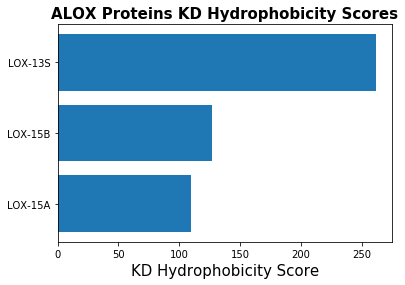

In [11]:
y = [-x for x in my_prot]
x = ["LOX-15A", "LOX-15B", "LOX-13S"]
plt.barh(x, y)
plt.xlabel('KD Hydrophobicity Score', fontsize=15)
plt.title('ALOX Proteins KD Hydrophobicity Scores', fontsize=15, fontweight='bold')
#plt.savefig('barplot.svg', format='svg', dpi=1200)
plt.show()

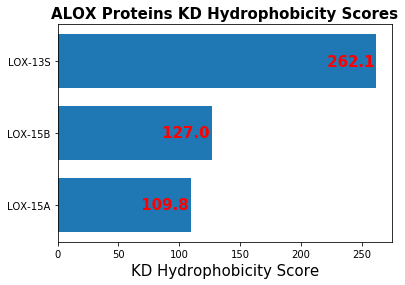

In [12]:
y = [-x for x in my_prot]
x = ["LOX-15A", "LOX-15B", "LOX-13S"]
fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(x))
ax.barh(x, y, width)
plt.title('ALOX Proteins KD Hydrophobicity Scores', fontsize=15, fontweight='bold')
plt.xlabel('KD Hydrophobicity Score', fontsize=15)
for i, v in enumerate(y):
    plt.text(v-45, i, " "+str(v), color='red', va='center', fontweight='bold', fontsize = 15)
#plt.savefig('barplot3.svg', format='svg', dpi=1200)

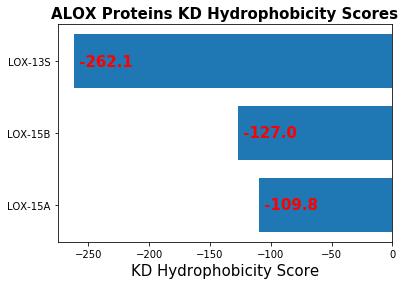

In [13]:
y = my_prot
x = ["LOX-15A", "LOX-15B", "LOX-13S"]
fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(x))
ax.barh(x, y, width)
plt.title('ALOX Proteins KD Hydrophobicity Scores', fontsize=15, fontweight='bold')
plt.xlabel('KD Hydrophobicity Score', fontsize=15)
for i, v in enumerate(my_prot):
    plt.text(v, i, " "+str(v), color='red', va='center', fontweight='bold', fontsize = 15)
#plt.savefig('barplot2.svg', format='svg', dpi=1200)

## Convert Hydrophobicity Values into DataFrame

You can skip this part completely, its just technichalities, but briefly, each residue starting from 1 to the end of each protein was converted into its K&D hydrophobicity score and stored into a dataframe, you can think of this last term as an excel sheet. Then, in order to make them representative, time series transformation was applied by taking the average of 30 redisues and sliding the values until the end of the sequence. You can check the previous document i sent long time ago and see why i choose 30; it makes the lines smoother and easier to follow. It also resembels the K&D original plot in expasy. In this way we can superpose the three line grphs and check hydrophobicity profile along the sequnce.

In [14]:
import itertools
def prot_list(id):
    proteins = []
    for seq in id:
        prot = doolitleindex(seq)
        proteins.append(prot)
    return proteins
A15A = list(itertools.chain.from_iterable(prot_list(NP_001131_3)))
A15B = list(itertools.chain.from_iterable(prot_list(NP_001034219_1)))
S13 = list(itertools.chain.from_iterable(prot_list(NP_001236153_2)))
lox_list = pd.DataFrame({'A15A': pd.Series(A15A),'A15B': pd.Series(A15B), 'Lin': pd.Series(S13)})
lox_list.head()

,A15A,A15B,Lin
0,1.9,1.9,1.9
1,-0.4,1.8,2.8
2,3.8,-3.5,-0.8
3,-1.3,2.8,1.8
4,-4.5,-4.5,-0.4


In [15]:
lox_list["A15A_2"] = lox_list["A15A"].rolling(30).mean()
lox_list["A15B_2"] = lox_list["A15B"].rolling(30).mean()
lox_list["Lin2"] = lox_list["Lin"].rolling(30).mean()
print(lox_list[25:35])
# Just checking to make sure it works as expected :) 

    A15A  A15B  Lin    A15A_2    A15B_2      Lin2
25   3.8   4.5 -0.4       NaN       NaN       NaN
26   4.2   4.2 -0.8       NaN       NaN       NaN
27  -0.4  -0.4  1.8       NaN       NaN       NaN
28  -3.5  -0.7  4.2       NaN       NaN       NaN
29  -3.2  -4.5 -3.5 -0.003333  0.116667 -0.116667
30  -0.4  -0.4 -3.5 -0.080000  0.040000 -0.296667
31  -3.5  -3.5  3.8 -0.183333 -0.136667 -0.263333
32   1.8  -0.8 -3.5 -0.250000 -0.046667 -0.353333
33   1.8  -1.6  1.8 -0.146667 -0.193333 -0.353333
34   3.8  -1.6  2.8  0.130000 -0.096667 -0.246667


In [16]:
lox_list2 = lox_list[["A15A_2", "A15B_2", "Lin2"]].copy(deep = True)
lox_list2.columns = ["LOX-15A", "LOX-15B", "LOX-13S"]
lox_list2.head()

,LOX-15A,LOX-15B,LOX-13S
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [17]:
df = pd.melt(lox_list2, ignore_index = False, value_vars=["LOX-15A", "LOX-15B", "LOX-13S"])
print(df[25:35])

   variable     value
25  LOX-15A       NaN
26  LOX-15A       NaN
27  LOX-15A       NaN
28  LOX-15A       NaN
29  LOX-15A -0.003333
30  LOX-15A -0.080000
31  LOX-15A -0.183333
32  LOX-15A -0.250000
33  LOX-15A -0.146667
34  LOX-15A  0.130000


In [18]:
df.columns = ["Protein", "H_Value"]
print(df[25:35])

    Protein   H_Value
25  LOX-15A       NaN
26  LOX-15A       NaN
27  LOX-15A       NaN
28  LOX-15A       NaN
29  LOX-15A -0.003333
30  LOX-15A -0.080000
31  LOX-15A -0.183333
32  LOX-15A -0.250000
33  LOX-15A -0.146667
34  LOX-15A  0.130000


The K&D score of the three proteins is shown below. A cleaner version is attached on the e-mail. LOX-15A is more hydrophylic on NTD side whereas LOX-15B is much more hydrophobic, which may affect their bindings to membrane. For NTD lengths based on structures see the next section. LOX-15A & B are quite comparable overall, very similar pattern because their sequences are also similar (check pairwise sequence alignments), while LOX-13S is quite different towards C-terminal

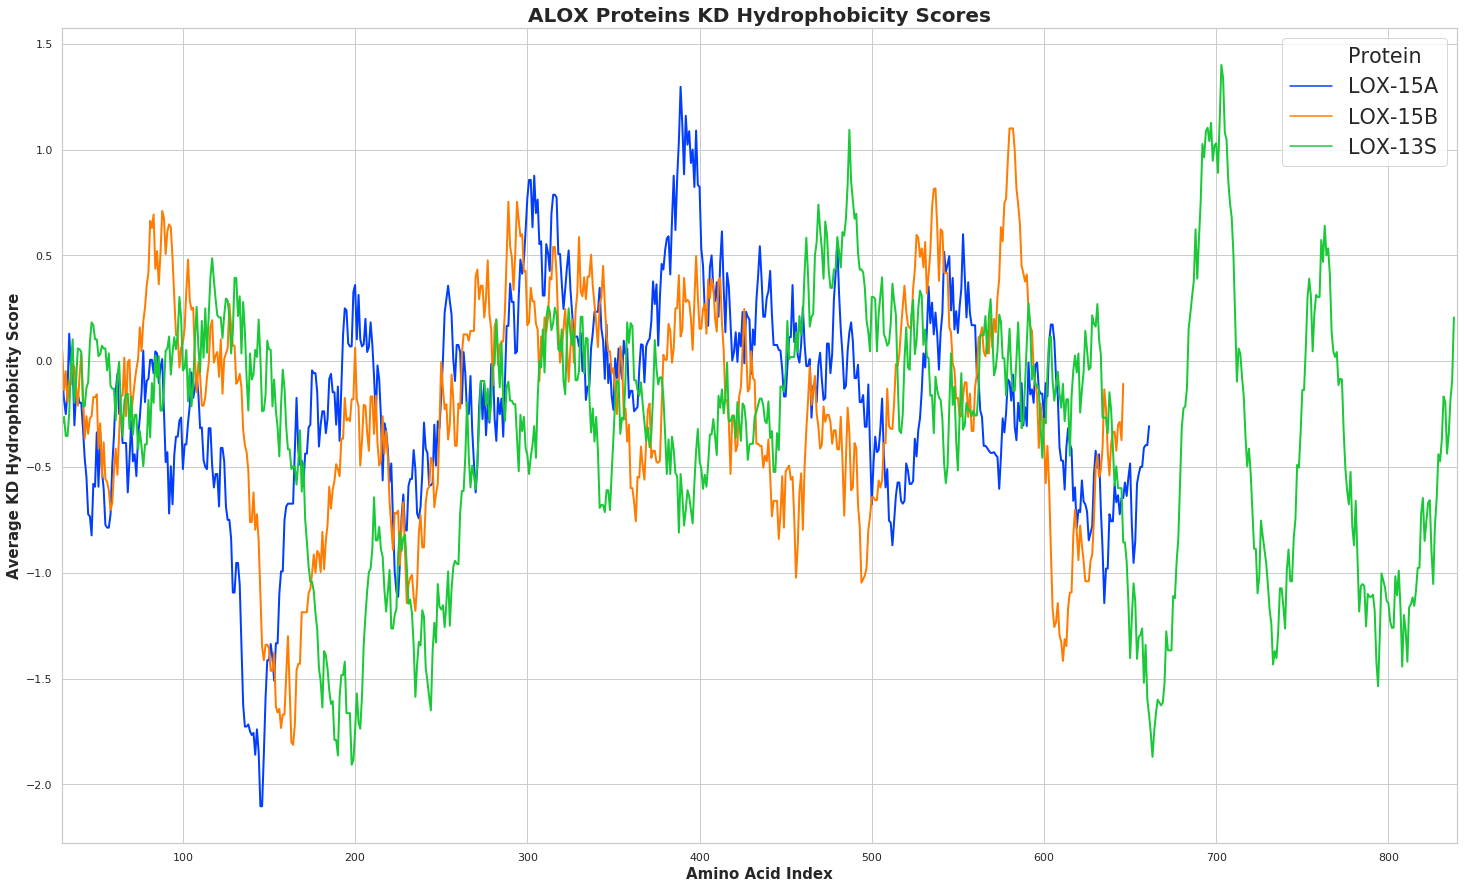

In [20]:
import seaborn as sns
sns.set(style="whitegrid")
fig=plt.figure(figsize=(25, 15))
sns.lineplot(x = df.index, y = "H_Value", hue = "Protein", data = df, palette = "bright", linewidth=2, sizes= 3)
plt.legend(fontsize='xx-large', title_fontsize='80',)
plt.xlim(30, 840)
plt.title('ALOX Proteins KD Hydrophobicity Scores', fontsize=20, fontweight='bold')
plt.ylabel('Average KD Hydrophobicity Score', fontsize=15, fontweight='bold')
plt.xlabel('Amino Acid Index', fontsize=15, fontweight='bold')
# plt.savefig('oveall_hidrophobicity.svg', format='svg', dpi=2000)  
plt.show()

## NTD Hydrophobicity Comparison

For this purpose, all the residues making up the NTD domain based on 3D structures (LOX-15A based on modeled structure, LOX15-B based on 4NRE since they are exactly the same on NTD, and LOX-13S based on 5T5V PDB structure) were extracted and their scores calculated separately using the same approach as the full sequence. Their lengths differ: LOX-15A NTD is 109, LOX-15B NTD is 119 and LOX-13S NTD is 144 residues (shown below). 

In [26]:
loxa_ntd = ("MGLYRIRVSTGASLYAGSNNQVQLWLVGQHGEAALGKRLWPARGKETELKVEVPEYLGPLLFVKLRKRHL"
            "LKDDAWFCNWISVQGPGAGDEVRFPCYRWVEGNGVLSLP")
loxb_ntd = ("MAEFRVRVSTGEAFGAGTWDKVSVSIVGTRGESPPLPLDNLGKEFTAGAEEDFQVTLPEDVGRVLLLRVH"
            "KAPPVLPLLGPLAPDAWFCRWFQLTPPRGGHLLFPCYQWLEGAGTLVLQ")
lin_ntd = ("MFSAGHKIKGTVVLMPKNELEVNPDGSAVDNLNAFLGRSVSLQLISATKADAHGKGKVGKDTFLEGINTS"
            "LPTLGAGESAFNIHFEWDGSMGIPGAFYIKNYMQVEFFLKSLTLEAISNQGTIRFVCNSWVYNTKLYKSVRIFF")

In [50]:
print("The Length of LOX-15A NTD is", len(loxa_ntd), "residues")
print("The Length of LOX-15B NTD is", len(loxb_ntd), "residues")
print("The Length of LOX-13S NTD is", len(lin_ntd), "residues")

The Length of LOX-15A NTD is 109 residues
The Length of LOX-15B NTD is 119 residues
The Length of LOX-13S NTD is 144 residues


In [28]:
names = [loxa_ntd, loxb_ntd, lin_ntd]
ntds = proteins(names)
ntds

[-22.8, 8.0, 3.1]

As mentioned above. LOX-15A is more hydrophilic on NTD while LOX-15B is the most hydrophobic. They are shown graphically below. Values are: **LOX-15A = -22.8, LOX-15B = 8.0, and  LOX-13S = 3.1**

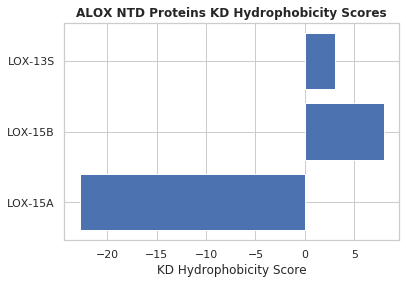

In [47]:
y = ntds
x = ["LOX-15A", "LOX-15B", "LOX-13S"]
plt.barh(x, y)
plt.xlabel('KD Hydrophobicity Score', fontsize=12)
plt.title('ALOX NTD Proteins KD Hydrophobicity Scores', fontsize=12, fontweight='bold')
plt.savefig('NTD_barplot.svg', format='svg', dpi=1200)
plt.show()

Same time series transformation as mentioned above was carried out here as well for NTD only. They ar eshown in the graph at the end of the document which is attached in hi-res form in email.

In [29]:
A15A = list(itertools.chain.from_iterable(prot_list(loxa_ntd)))
A15B = list(itertools.chain.from_iterable(prot_list(loxb_ntd)))
S13 = list(itertools.chain.from_iterable(prot_list(lin_ntd)))
lox_list = pd.DataFrame({'A15A': pd.Series(A15A),'A15B': pd.Series(A15B), 'Lin': pd.Series(S13)})
lox_list.head()

,A15A,A15B,Lin
0,1.9,1.9,1.9
1,-0.4,1.8,2.8
2,3.8,-3.5,-0.8
3,-1.3,2.8,1.8
4,-4.5,-4.5,-0.4


In [30]:
lox_list["A15A_2"] = lox_list["A15A"].rolling(30).mean()
lox_list["A15B_2"] = lox_list["A15B"].rolling(30).mean()
lox_list["Lin2"] = lox_list["Lin"].rolling(30).mean()
print(lox_list[25:35])

    A15A  A15B  Lin    A15A_2    A15B_2      Lin2
25   3.8   4.5 -0.4       NaN       NaN       NaN
26   4.2   4.2 -0.8       NaN       NaN       NaN
27  -0.4  -0.4  1.8       NaN       NaN       NaN
28  -3.5  -0.7  4.2       NaN       NaN       NaN
29  -3.2  -4.5 -3.5 -0.003333  0.116667 -0.116667
30  -0.4  -0.4 -3.5 -0.080000  0.040000 -0.296667
31  -3.5  -3.5  3.8 -0.183333 -0.136667 -0.263333
32   1.8  -0.8 -3.5 -0.250000 -0.046667 -0.353333
33   1.8  -1.6  1.8 -0.146667 -0.193333 -0.353333
34   3.8  -1.6  2.8  0.130000 -0.096667 -0.246667


In [31]:
lox_list2 = lox_list[["A15A_2", "A15B_2", "Lin2"]].copy(deep = True)
lox_list2.columns = ["LOX-15A", "LOX-15B", "LOX-13S"]
lox_list2.head()

,LOX-15A,LOX-15B,LOX-13S
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [32]:
df = pd.melt(lox_list2, ignore_index = False, value_vars=["LOX-15A", "LOX-15B", "LOX-13S"])
print(df[25:35])

   variable     value
25  LOX-15A       NaN
26  LOX-15A       NaN
27  LOX-15A       NaN
28  LOX-15A       NaN
29  LOX-15A -0.003333
30  LOX-15A -0.080000
31  LOX-15A -0.183333
32  LOX-15A -0.250000
33  LOX-15A -0.146667
34  LOX-15A  0.130000


In [33]:
df.columns = ["Protein", "H_Value"]
print(df[25:35])

    Protein   H_Value
25  LOX-15A       NaN
26  LOX-15A       NaN
27  LOX-15A       NaN
28  LOX-15A       NaN
29  LOX-15A -0.003333
30  LOX-15A -0.080000
31  LOX-15A -0.183333
32  LOX-15A -0.250000
33  LOX-15A -0.146667
34  LOX-15A  0.130000


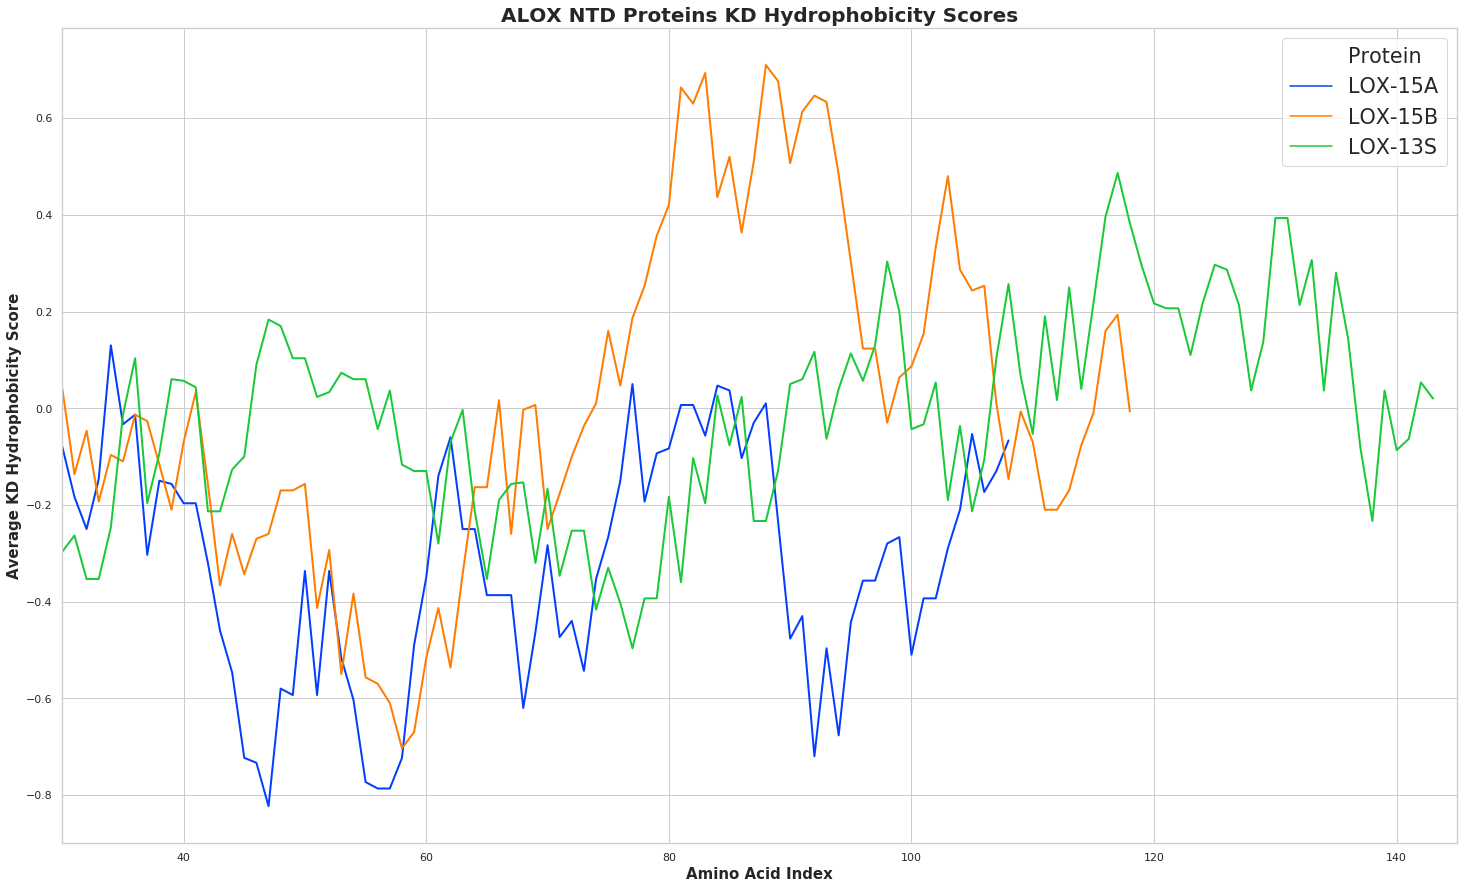

In [36]:
import seaborn as sns
sns.set(style="whitegrid")
fig=plt.figure(figsize=(25, 15))
sns.lineplot(x = df.index, y = "H_Value", hue = "Protein", data = df, palette = "bright", linewidth=2, sizes= 3)
plt.legend(fontsize='xx-large', title_fontsize='80',)
plt.xlim(30, 145)
plt.title('ALOX NTD Proteins KD Hydrophobicity Scores', fontsize=20, fontweight='bold')
plt.ylabel('Average KD Hydrophobicity Score', fontsize=15, fontweight='bold')
plt.xlabel('Amino Acid Index', fontsize=15, fontweight='bold')
plt.savefig('NTD_hidrophobicity.svg', format='svg', dpi=2000)  
plt.show()